<a href="https://colab.research.google.com/github/ralsouza/python_fundamentos/blob/master/src/06_Modulos_Analise_de_Dados/17_Scikit_Learn_Prever_Preco_Pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prevendo o Preço da Pizza
**Suponha que você queira prever o preço da pizza. Para isso, vamos criar um modelo de regressão linear para prever o preço da pizza, baseado em um atributo da pizza que podemos observar. Vamos modelar a relação entre o tamanho (diâmetro) de uma pizza e seu preço. Escreveremos então um programa com sckit-learn, que prevê o preço da pizza dado seu tamanho.
Como queremos prever um valor numérico, a regressão é o indicado para este tipo de problema**

---
Obs 1: O conjunto de técnicas de regressão é muito provavelmente um dos modelos mais simples utilizados em análises de dados que procuram entender a relação do comportamento em determinado fenômeno e comportamento de uma ou mais variáveis potencialmente preditoras, sem que haja, entretanto uma obrigatória relação de causa e efeito.

---
Obs 2: É fundamental que o pesquisador seja muito cuidadoso e criterioso ao interpretar os resultados de uma modelagem de regressão.
A existência de um modelo de regressão não significa que ocorra, obrigatóriamente, relação de causa e efeito entre variáveis consideradas/

In [0]:
# Import Matplotlib and Numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Let's assume that you registered the price of the pizzas that you have in last months with your family.

In [2]:
my_pizzas = {
    'Diameter (cm)': [7,10,15,30,45],
    'Price (R$)': [8,11,16,38.5,52]
}

df = pd.DataFrame(my_pizzas)

df

,Diameter (cm),Price (R$)
0,7,8.0
1,10,11.0
2,15,16.0
3,30,38.5
4,45,52.0


## We will do a little exploratory analysis

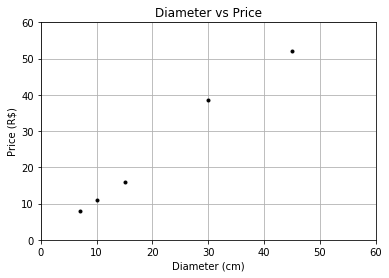

In [3]:
plt.figure()
plt.xlabel('Diameter (cm)')
plt.ylabel('Price (R$)')
plt.title('Diameter vs Price')
plt.plot(df['Diameter (cm)'],df['Price (R$)'],'k.')
plt.axis([0,60,0,60])
plt.grid(True)
plt.show()

According to the chart, we can see a positive relation between the diameter and price, what is confirmed by the experience to have a pizza with your family. As the diameter increases, the price increases too.

It does not mean necessarily a relation of cause and effect, the price could increase due to other factors.

### Now let's model the relation using linear regression and create a model to predict the price's pizza.

### The class sklearn.linear_model.LinearRegression is a estimator. The estimator predicts a value based on the observed data. In Scikit-Learn, all estimators implements the methods ```fit()``` and ```predict()```. The method ```fit()``` is used to learn about the model's parameters and the method ```predict()``` is used do predict a value's of a dependent variable in relation to another explanatory variable using the learned parameters.



In [0]:
# Import the Regression Linear module from Scikit-Learn
from sklearn.linear_model import LinearRegression

In [0]:
# Prepare the data to train

# Let's call X the diameter data
x = [[7],[10],[15],[30],[45]]

# And let's call Y the price data
y = [[8],[11],[16],[38.5],[52]]

In [0]:
# Create the model
model = LinearRegression()

In [7]:
type(model)

sklearn.linear_model._base.LinearRegression

In [8]:
# Train model
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Predict the price of a pizza with 20cm in diameter
# The model never calculates a pizza with 20cm
# The predict will be based on trained data
print('The pizza with 20cm in diameter should cost: R$ %.2f' % model.predict([[20]]))

The pizza with 20cm in diameter should cost: R$ 23.41


This happen because the model calculates the mathematical relation between diameter and price.

It's the simple regression formula, the model only replace the the parameters in the formula bellow.

$y=\alpha+\beta x$

Y - Is a predict value of the dependent variable (In our example, is pizza's value)
X - Is a explanatory variable (In our example, is pizza's diameter)

**Alpha** is the interception or linear coefficient.

**Beta** is the coefficient from each variable or angular coefficient.

Alpha and Beta are parameters that are calculated by the model.


## Create a Scatter Plot

In [12]:
# Coefficients
print('Coefficient: \n', model.coef_)

# MSE (Mean Square Error)
print('MSE: %.2f' % np.mean((model.predict(x) - y) ** 2))

# Score of the variation: 1 means the perfect prediction
print('Score of variation: %.2f' % model.score(x,y))

Coefficient: 
 [[1.20422117]]
MSE: 2.74
Score of variation: 0.99


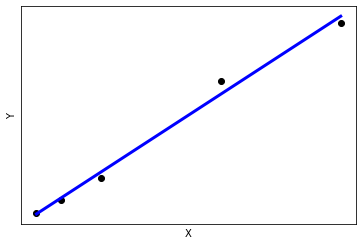

In [15]:
# Scatter plot showing the linear regression
plt.scatter(x,y, color='black')
plt.plot(x, model.predict(x), color='blue',linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(())
plt.yticks(())

plt.show()

The blue line represents the predict values.